# EXPLORATORY DATA ANALYSIS

<div style="background-color: black|; padding: 10px; border-radius: 5px;">
    

Exploratory Data Analysis (EDA) is a critical first step before starting clustering to understand the structure, relationships, and characteristics of the dataset. Here’s how to perform EDA for clustering:

1. Data Overview: Start by examining the dataset for size, data types, and missing values. Check the number of features and samples to understand the dataset's complexity.

2. Missing Data Handling: Identify and handle missing values through imputation or removal to ensure clustering algorithms can process the data accurately.

3. Visualizations: Use pair plots, heatmaps, and scatter plots to explore relationships and clusters within the data visually.
    
    </div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [2]:
pip install kneed

## Import Data


In [33]:
df = pd.read_csv("https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/student_dropout_behavior_dataset.csv")
df.head()

,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended
0,1,Kristina Vaughan,19,Male,8.0,5.7,7.4,5,NaN,30.0,36.5,2.57,12,4,6,1
1,2,Rodney Daniels,21,Male,10.0,7.9,4.1,5,NaN,25.4,33.0,2.40,12,1,6,5
2,3,Jose Nash,19,Female,7.5,1.2,0.3,5,NaN,14.4,24.8,2.99,12,0,6,0
3,4,Nicole Martin,21,Male,5.2,2.5,9.9,5,NaN,17.7,41.0,1.68,12,9,6,0
4,5,Shelby Smith,21,Female,5.9,6.3,2.0,5,NaN,23.8,31.0,2.53,12,7,6,4


## 1. Data Understanding & Preparation

In [34]:
# Shape (rows, columns)
df.shape

(300, 16)

In [35]:
# Data types for each column
df.dtypes

student_id                 int64
name                      object
age                        int64
gender                    object
quiz1_marks              float64
quiz2_marks              float64
quiz3_marks              float64
total_assignments          int64
assignments_submitted    float64
midterm_marks            float64
final_marks              float64
previous_gpa             float64
total_lectures             int64
lectures_attended          int64
total_lab_sessions         int64
labs_attended              int64
dtype: object

In [36]:
# Basic descriptive statistics (mean, std, min, max, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             300 non-null    int64  
 1   name                   300 non-null    object 
 2   age                    300 non-null    int64  
 3   gender                 300 non-null    object 
 4   quiz1_marks            300 non-null    float64
 5   quiz2_marks            300 non-null    float64
 6   quiz3_marks            300 non-null    float64
 7   total_assignments      300 non-null    int64  
 8   assignments_submitted  0 non-null      float64
 9   midterm_marks          300 non-null    float64
 10  final_marks            300 non-null    float64
 11  previous_gpa           300 non-null    float64
 12  total_lectures         300 non-null    int64  
 13  lectures_attended      300 non-null    int64  
 14  total_lab_sessions     300 non-null    int64  
 15  labs_a

In [37]:
# Check and handle missing values (if any)
print(df.isnull().sum())

student_id                 0
name                       0
age                        0
gender                     0
quiz1_marks                0
quiz2_marks                0
quiz3_marks                0
total_assignments          0
assignments_submitted    300
midterm_marks              0
final_marks                0
previous_gpa               0
total_lectures             0
lectures_attended          0
total_lab_sessions         0
labs_attended              0
dtype: int64


In [38]:
#show unique values from dataset before encoding
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'student_id': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175,

In [39]:
# beda semua valuenya (name, student_id), 
# valuenya sama semua (total_assignments [5}, total_lectures [12], total_lab_sessions [6]) 
# null semua (assignments_submitted)
df = df.drop(columns=['student_id','name','assignments_submitted','total_assignments', 'total_lectures', 'total_lab_sessions'])
df.head()

,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
0,19,Male,8.0,5.7,7.4,30.0,36.5,2.57,4,1
1,21,Male,10.0,7.9,4.1,25.4,33.0,2.40,1,5
2,19,Female,7.5,1.2,0.3,14.4,24.8,2.99,0,0
3,21,Male,5.2,2.5,9.9,17.7,41.0,1.68,9,0
4,21,Female,5.9,6.3,2.0,23.8,31.0,2.53,7,4


In [40]:
from sklearn.preprocessing import LabelEncoder
gender_map = {
    'Male': 0,
    'Female': 1
}
df['gender'] = df['gender'].map(gender_map)
df.head()

,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
0,19,0,8.0,5.7,7.4,30.0,36.5,2.57,4,1
1,21,0,10.0,7.9,4.1,25.4,33.0,2.40,1,5
2,19,1,7.5,1.2,0.3,14.4,24.8,2.99,0,0
3,21,0,5.2,2.5,9.9,17.7,41.0,1.68,9,0
4,21,1,5.9,6.3,2.0,23.8,31.0,2.53,7,4


In [41]:
# Add a new column for easier visualization (Got 12 and 6 from previous unique values)
df["lecture_attendance_rate"] = df["lectures_attended"] / 12
df["lab_attendance_rate"] = df["labs_attended"] / 6

## 2. Exploratory Data Analysis (EDA)

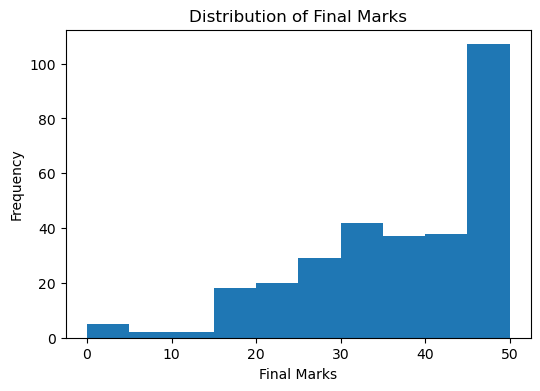

In [44]:
plt.figure(figsize=(6,4))
plt.hist(df["final_marks"])
plt.title("Distribution of Final Marks")
plt.xlabel("Final Marks")
plt.ylabel("Frequency")
plt.show()

The bar chart shows a clear right-skewed pattern, with the majority of students clustering between 40 and 50, and only a small fraction scoring below 20. This creates a pronounced ceiling effect, where more than a third of the class occupies the uppermost bin. Statistically, the long tail on the left indicates that the skewness is positive, meaning low scorers are rare while high scorers dominate the distribution. This suggests that the assessment may not be sufficiently challenging, as it fails to differentiate performance across the student population. When such a large proportion of students approach the maximum possible score, the exam’s discriminatory power weakens—making it harder to distinguish between average, strong, and exceptional understanding. From a teaching perspective, this pattern implies that future iterations of the final exam may require increased complexity, greater conceptual depth, or wider mark ranges to produce a more informative spread of student performance.

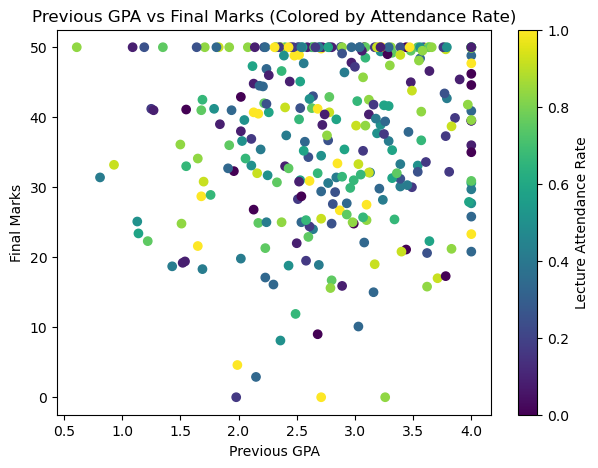

In [45]:
plt.figure(figsize=(7,5))
plt.scatter(df["previous_gpa"], df["final_marks"], c=df["lecture_attendance_rate"])
plt.xlabel("Previous GPA")
plt.ylabel("Final Marks")
plt.title("Previous GPA vs Final Marks (Colored by Attendance Rate)")
plt.colorbar(label="Lecture Attendance Rate")
plt.show()

The scatter plot shows a generally positive relationship, students with higher GPAs tend to achieve higher final exam scores. This indicates that prior academic performance is a meaningful predictor of current course outcomes, although the relationship is not perfectly linear nor tightly clustered. The dispersion of points particularly the wide vertical spread among students with GPAs between 2.0 and 3.5 suggests moderate variability, meaning GPA alone does not fully explain performance in the final exam. The color gradient adds a second dimension: students with higher attendance rates (lighter colors) are more frequently found in the upper half of the score distribution, confirming that consistent attendance tends to amplify performance. Conversely, low-attendance students are scattered across the plot but show a noticeable presence in the mid-to-lower score range, even among those with strong GPAs. Statistically, this interaction effect indicates that attendance moderates the relationship between GPA and performance—students with lower GPAs can compensate through high attendance, while strong students may underperform if they attend irregularly. Pedagogically, the pattern underscores the importance of maintaining student engagement in lectures, as attendance appears to strengthen performance regardless of incoming academic ability.

# Data Transformation & PCA

In [46]:
scaler = StandardScaler()

df_transformed = df.copy()

# Apply StandardScaler to the identified numerical columns
df_transformed = scaler.fit_transform(df_transformed)

# Convert the numpy array back to a DataFrame with original column names for display
df_transformed = pd.DataFrame(df_transformed, columns=df.columns)

# Display the head of the transformed DataFrame to verify
print("DataFrame after standardizing numerical columns:")
df_transformed.head()

DataFrame after standardizing numerical columns:


,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended,lecture_attendance_rate,lab_attendance_rate
0,-1.139540,-1.033908,0.463198,-0.069135,0.713452,1.214638,-0.074297,-0.322683,-0.541191,-1.065997,-0.541191,-1.065997
1,-0.245783,-1.033908,1.706127,0.843441,-0.505808,0.657631,-0.371484,-0.555091,-1.347601,0.954850,-1.347601,0.954850
2,-1.139540,0.967204,0.152466,-1.935767,-1.909804,-0.674341,-1.067750,0.251502,-1.616404,-1.571208,-1.616404,-1.571208
3,-0.245783,-1.033908,-1.276902,-1.396518,1.637133,-0.274750,0.307801,-1.539408,0.802826,-1.571208,0.802826,-1.571208
4,-0.245783,0.967204,-0.841877,0.179750,-1.281700,0.463890,-0.541305,-0.377367,0.265219,0.449638,0.265219,0.449638


# 3. PRINCIPAL COMPONENT ANALYSIS


Ref: https://statisticsglobe.com/principal-component-analysis-python

First, we should choose the ideal number of components before interpreting the results. One alternative is to conduct a PCA for all or an arbitrarily large number of components, then visualize the percentage of explained variance or the eigenvalues per component using a scree plot. Based on the graph, the optimal number can be selected. Let’s run our PCA for ten components!

In [47]:
pca = PCA(n_components=12) #why 12 bcs that is total column we have

pca.fit_transform(df_transformed)

array([[ 2.70639798e-01, -1.66380967e+00, -6.16302054e-01, ...,
        -3.14670727e-01, -5.18163984e-18, -2.80373414e-17],
       [-2.50395134e+00, -4.24063704e-01, -9.34835034e-01, ...,
        -7.44283010e-01,  5.63534756e-17,  8.85606848e-16],
       [-1.80969682e-01, -3.27814794e+00, -1.01741000e+00, ...,
         6.68635300e-01, -2.32071996e-16, -7.56670992e-16],
       ...,
       [-1.26887274e+00,  1.74077982e+00,  6.26377545e-01, ...,
         6.73196366e-02, -4.13215366e-16, -5.61587431e-18],
       [-2.43156173e+00,  4.88462809e-01, -4.05885251e-01, ...,
        -8.85613278e-01,  9.55636910e-19,  6.61586959e-16],
       [-6.96709263e-01,  1.36310180e+00, -2.48124804e-01, ...,
         6.86254326e-01,  5.45372558e-16,  4.79136194e-16]])

Once we have our PCA done, we can extract the proportion of variance explained and the eigenvalues as follows.

In [48]:
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

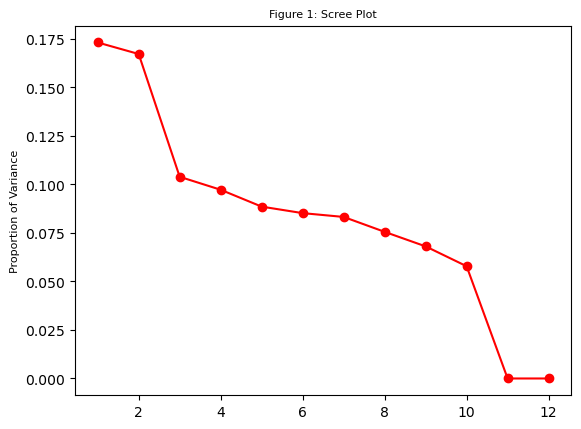

In [49]:
PC_numbers = np.arange(pca.n_components_) + 1
plt.plot(PC_numbers,
         prop_var,
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

In [50]:
pca_full = PCA().fit(df_transformed)
explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)

print("\nExplained variance per PC (percent) & cumulative:")
for i, (e, c) in enumerate(zip(explained*100, cum_explained*100), start=1):
    print(f"PC{i:02d}: {e:.2f}%  |  Cumulative: {c:.2f}%")


Explained variance per PC (percent) & cumulative:
PC01: 17.31%  |  Cumulative: 17.31%
PC02: 16.72%  |  Cumulative: 34.03%
PC03: 10.39%  |  Cumulative: 44.43%
PC04: 9.72%  |  Cumulative: 54.15%
PC05: 8.86%  |  Cumulative: 63.01%
PC06: 8.52%  |  Cumulative: 71.53%
PC07: 8.32%  |  Cumulative: 79.85%
PC08: 7.56%  |  Cumulative: 87.41%
PC09: 6.81%  |  Cumulative: 94.22%
PC10: 5.78%  |  Cumulative: 100.00%
PC11: 0.00%  |  Cumulative: 100.00%
PC12: 0.00%  |  Cumulative: 100.00%


Based on the result, the 7 principal components account for 79.85% of the variance in the data and are within the recommended 70–80% range for meaningful information retention. This makes the seven-component solution compliant with the threshold while avoiding unnecessary dimensionality.

Although including an eighth component raises the cumulative variance to 87.41%, the additional variance gained from PC08 is marginal compared to the complexity cost of expanding the feature space. In contrast, PC07 is the final component that meaningfully contributes toward reaching the upper boundary of the target variance range. Selecting 7 PCs strikes the optimal balance between information preservation and model simplicity, making it the most efficient foundation for the upcoming KMeans clustering.

In [51]:
pca = PCA(n_components=7)
PC = pca.fit_transform(df_transformed)

Let’s store the component scores in a DataFrame and check it via the head() method!

In [52]:
df_pca = pd.DataFrame(data = PC, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

df_pca.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.270640,-1.663810,-0.616302,-0.137391,-0.150724,0.537307,-0.037421
1,-2.503951,-0.424064,-0.934835,-0.476129,0.115019,-1.386700,0.439732
2,-0.180970,-3.278148,-1.017410,1.251639,-2.286587,0.034461,-0.363130
3,2.309667,-0.715948,-0.635166,-1.126939,0.541562,1.948302,-1.300632
4,0.193027,0.767402,-0.411374,-0.054531,-1.123498,-0.071699,1.338291


Now, we can form the biplot. For further information on how to do this, see Biplot in Python. Here, we will use a user-defined biplot() function for the implementation.

In [53]:
def biplot(score,coef,labels=None, colors=None):

    xs = score[:,0]
    ys = score[:,1]
    n = coef.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    if colors is not None:
        unique_clusters = np.unique(colors)
        for cluster_label in unique_clusters:
            # Filter points belonging to the current cluster
            cluster_mask = (colors == cluster_label)
            plt.scatter(xs[cluster_mask] * scalex,
                        ys[cluster_mask] * scaley,
                        s=5,
                        label=f'Cluster {int(cluster_label)}')
        plt.legend()
    else:
        plt.scatter(xs * scalex,ys * scaley,
                    s=5,
                    color='orange') # Changed 'color' to 'c' and used 'colors' parameter

    for i in range(n):
        plt.arrow(0, 0, coef[i,0],
                  coef[i,1],color = 'purple',
                  alpha = 0.5)
        plt.text(coef[i,0]* 1.2, # Adjusted position
                 coef[i,1] * 1.2, # Adjusted position
                 labels[i],
                 color = 'darkblue',
                 ha = 'center',
                 va = 'center')
    # --------------------------------------
    # ADD DOTTED REFERENCE LINES (like example)
    # --------------------------------------
    plt.axhline(0, color='black', linestyle='dotted', linewidth=1)
    plt.axvline(0, color='black', linestyle='dotted', linewidth=1)

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))


After defining our function, we just have to call it.



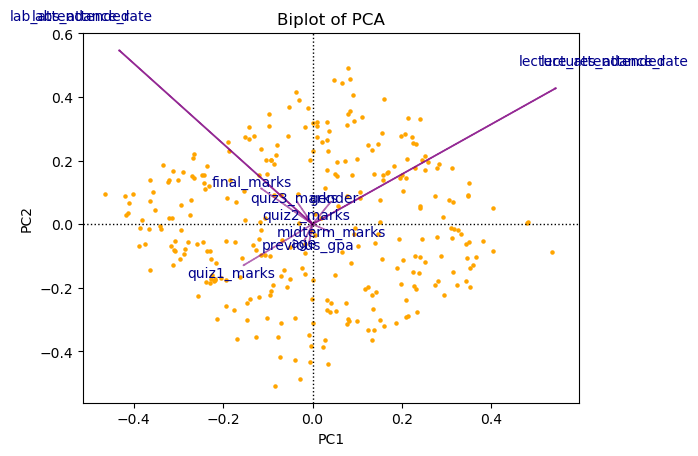

In [54]:
plt.title('Biplot of PCA')

biplot(PC,
       np.transpose(pca.components_),
       list(df_transformed.columns))

1. PC1 accounts for 17.31% of the total variance and functions as a broad axis of Academic Performance versus Attendance-Heavy Engagement. On the negative (left) side, nearly all performance-related variables load strongly—final_marks, quiz1_marks, quiz3_marks, and previous_gpa. In practical terms, students with high scores on these original metrics end up on the far-left side of PC1. On the positive (right) side, the only notable contributor is lectures_attend_date, which pushes the axis toward a pattern dominated by attendance frequency. PC1 separates students who actually perform well (strong achievement across exams and quizzes) from students who show up frequently but do not achieve proportional academic results.

2. PC2 captures 16.72% of the variance and primarily describes a spectrum of Engagement and Effort. On the positive (upper) side, both attendance variables—lab_attend_date and lectures_attend_date—load strongly, marking this direction as high engagement. On the negative (lower) side, quiz1_marks loads distinctly, pulling students with weaker early performance downward.PC2 acts as a Current Effort / Student Engagement axis. Students positioned high on PC2 are consistently present in both lectures and labs, showing strong day-to-day academic engagement. Students positioned lower are those with weaker early assessments—particularly quiz 1—and tend to be less engaged overall. Essentially, PC2 separates students who show up and participate from those who struggle early and remain less involved.

3. - Most Important for PC1: lab_attend_date (High magnitude, negative PC1/positive PC2 quadrant), lectures_attend_date (High magnitude, positive PC1/positive PC2 quadrant) and final_marks (High magnitude, primarily negative PC1)
    - Most Important for PC2: lab_attend_date (Highest positive loading) and lectures_attend_date (Strong positive loading)

# 4. K-MEANS CLUSTERING

You need to decide how many clusters (K) you want to create. One way to do this is by using the elbow method, which plots the within-cluster sum of squares (WCSS) for different values of K and looks for the "elbow" point where the WCSS starts to level off.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

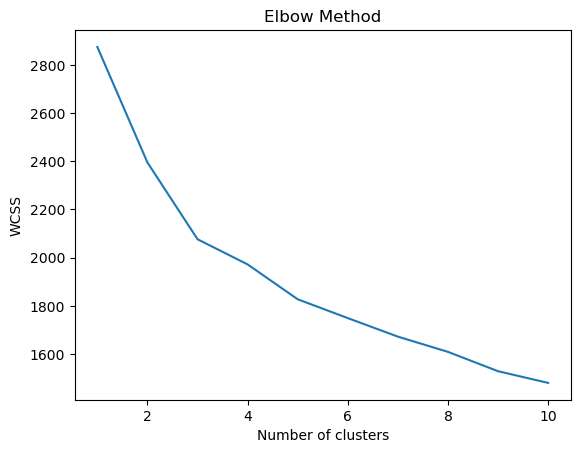

In [ ]:
wcss = []
for i in range(1, 11): #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [56]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters         WCSS
0                   1  2874.711513
1                   2  2395.124460
2                   3  2076.434553
3                   4  1971.867875
4                   5  1827.092781
5                   6  1748.946945
6                   7  1672.036941
7                   8  1608.775417
8                   9  1528.445286
9                  10  1479.957005


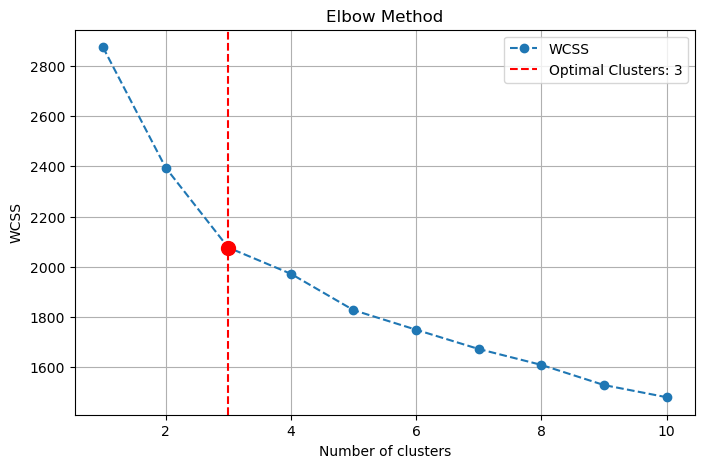

The optimal number of clusters is: 3


In [57]:
from kneed import KneeLocator  # Library to detect the "knee" point

# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")


In [58]:
# Fit K-Means to the data with optimal cluster
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++',random_state=42)
kmeans_cluster = kmeans.fit_predict(df_pca)

# Add the cluster labels to the DataFrame
df['KMeans'] = kmeans_cluster
df_transformed['KMeans'] = kmeans_cluster

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [65]:
# Evaluation
ss = silhouette_score(df_pca, kmeans_cluster)
print("The silhoutte score for the final model", ss)

The silhoutte score for the final model 0.15766503423602973


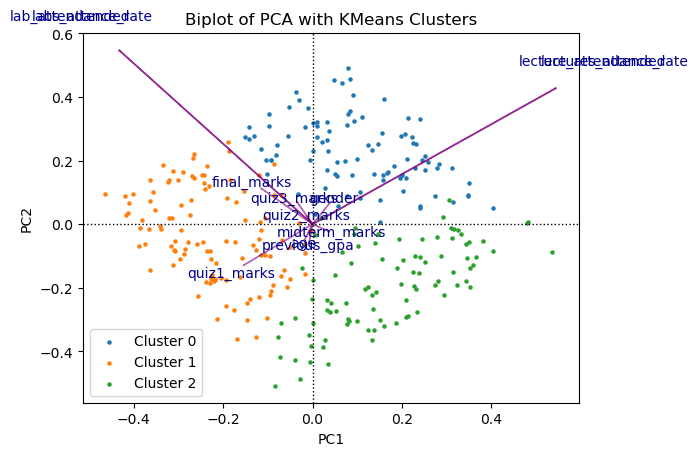

In [66]:
plt.title('Biplot of PCA with KMeans Clusters')
biplot(PC,
       np.transpose(pca.components_),
       list(df_transformed.columns),
       colors=df_transformed['KMeans'])
plt.show()

In [67]:
df.head()

,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended,lecture_attendance_rate,lab_attendance_rate,KMeans
0,19,0,8.0,5.7,7.4,30.0,36.5,2.57,4,1,0.333333,0.166667,2
1,21,0,10.0,7.9,4.1,25.4,33.0,2.40,1,5,0.083333,0.833333,1
2,19,1,7.5,1.2,0.3,14.4,24.8,2.99,0,0,0.000000,0.000000,2
3,21,0,5.2,2.5,9.9,17.7,41.0,1.68,9,0,0.750000,0.000000,2
4,21,1,5.9,6.3,2.0,23.8,31.0,2.53,7,4,0.583333,0.666667,0


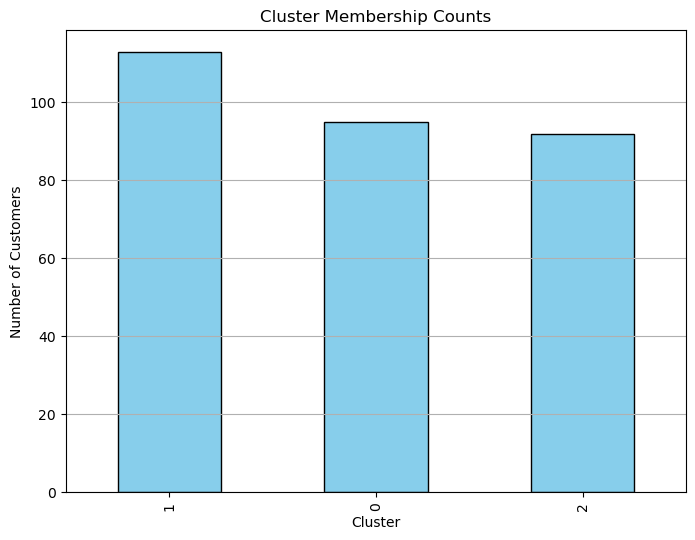

In [68]:
cluster_counts = df['KMeans'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

In [72]:
analyze_cols = ['previous_gpa', 'quiz1_marks', 'quiz2_marks', 'quiz3_marks', 'midterm_marks', 'final_marks',
'lecture_attendance_rate', 'lab_attendance_rate', 'gender']

print("--- K-Means Cluster Summary ---")
kmeans_summary = df.groupby('KMeans')[analyze_cols].mean()
print(kmeans_summary)

--- K-Means Cluster Summary ---
        previous_gpa  quiz1_marks  quiz2_marks  quiz3_marks  midterm_marks  \
KMeans                                                                       
0           2.859789     6.991579     6.147368     5.561053      19.110526   
1           2.825841     7.526549     5.806195     5.768142      20.489381   
2           2.726196     7.192391     5.651087     5.006522      20.216304   

        final_marks  lecture_attendance_rate  lab_attendance_rate    gender  
KMeans                                                                       
0         39.350526                 0.820175             0.696491  0.600000  
1         39.341593                 0.216077             0.684366  0.495575  
2         32.919565                 0.521739             0.130435  0.456522  


# 5. Cluster Profiling & Educational Recommendations

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


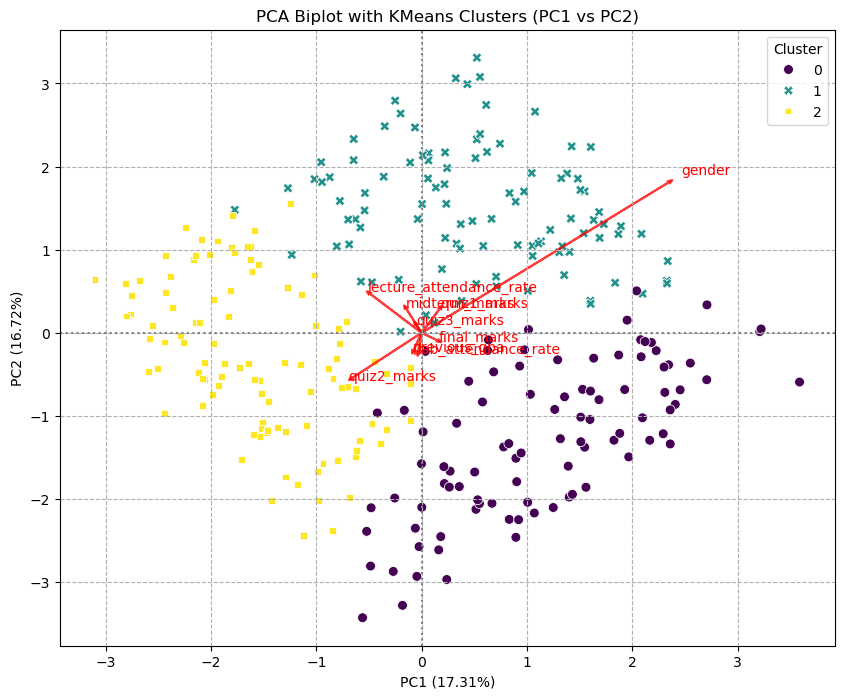

In [ ]:
optimal_k = 3 
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
kmeans_final.fit(df_pca) 
df_pca['Cluster'] = kmeans_final.labels_
loadings = pca.components_[:2].T * np.sqrt(pca.explained_variance_[:2])
feature_names = analyze_cols # Replace with your list of scaled feature names (e.g., ['final_marks', ...])

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df_pca.iloc[:, 0], 
    y=df_pca.iloc[:, 1], 
    hue=df_pca['Cluster'], 
    palette='viridis', 
    style=df_pca['Cluster'], 
    s=50, 
    legend='full'
)
for i, feature in enumerate(feature_names):
    # Scale vector size for better visibility, e.g., multiply by a factor (adjust as needed)
    arrow_scale = 3.0 
    plt.arrow(
        0, 0, 
        loadings[i, 0] * arrow_scale,  # PC1 coordinate
        loadings[i, 1] * arrow_scale,  # PC2 coordinate
        color='r', alpha=0.75, linewidth=1.5, head_width=0.03
    )
    # Add text label slightly offset from the arrow head
    plt.text(
        loadings[i, 0] * arrow_scale * 1.05, 
        loadings[i, 1] * arrow_scale * 1.05, 
        feature, 
        color='r', fontsize=10
    )

plt.axhline(0, color='gray', linestyle='dotted')
plt.axvline(0, color='gray', linestyle='dotted')
plt.title('PCA Biplot with KMeans Clusters (PC1 vs PC2)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.grid(True, linestyle='--')
plt.show()

Cluster Descriptions:
1. Cluster 0: "High Engagement Achievers"
    These students have the highest average Previous GPA and maintain high Lecture and Lab attendance (0.82 and 0.70, respectively). They achieve excellent final marks ($\approx 39/50$). This is the best-rounded group, demonstrating both past aptitude and current commitment.
2. Cluster 1: "Disengaged but High Performers (Exam-Focused)"
    This cluster has an extremely low Lecture Attendance Rate ($\approx 22\%$!) but manages to achieve final marks identical to the High Achievers ($\approx 39/50$). Their quiz marks and previous GPA are average. This group relies heavily on self-study or cramming, performing well on major exams despite minimal engagement.
3. Cluster 2: "At-Risk/Struggling Students"
    This is the most concerning cluster. They have the lowest Final Marks ($\approx 33/50$) and extremely low Lab Attendance Rate ($\approx 13\%$). Their overall performance (quizzes, final) is the lowest, and they show minimal engagement in practical/lab sessions, leading to a poorer learning outcome.

<br>

The PCA biplot, overlaid with cluster assignments, illustrates how students distribute across two dominant dimensions: Academic Performance (PC1) and Engagement/Effort (PC2), accounting for 17.31% and 16.72% of the variance respectively. PC1 captures overall achievement, with performance variables such as final marks, midterm marks, quizzes, and previous GPA loading strongly in the positive direction, meaning students with higher scores lie toward the right side of the plot. PC2 reflects effort-driven behaviors, as both lecture and lab attendance loads positively, placing more engaged students toward the top. Within this space, the clusters occupy distinct and meaningful regions: Cluster 0 appears in the lower-right quadrant, showing high PC1 but low PC2 scores, indicating students who perform very well academically despite low engagement—“disengaged high performers.” Cluster 1, positioned in the upper-center region, exhibits both positive PC1 and high PC2 scores, driven by strong alignment with attendance vectors, representing “high-engagement achievers.” Cluster 2 sits in the upper-left quadrant with negative PC1 but moderately positive PC2 values, revealing students who attend but consistently underperform, matching the “at-risk/struggling” profile. Overall, the biplot demonstrates that PC1 effectively separates high- and low-performing students, while PC2 distinguishes between types of achievers, highlighting that engagement and performance operate as independent behavioral dimensions, with some students excelling regardless of attendance and others attending frequently yet still underperforming.

<br>
Recommendation:
1. Targeted Remedial Action for Cluster 2: 
    Implement mandatory, small-group lab tutoring sessions specifically for Cluster 2 students. Focus on foundational concepts and direct assistance with lab work.Link to Findings: Cluster 2 has the lowest final_marks and a critically low lab_attendance_rate (13%). The PCA biplot shows lab_attend_date is a key driver of PC2, suggesting lab engagement is crucial for separating high/low performance. Improving lab attendance and mastery is the most direct intervention.
2. Engagement Incentives for Cluster 1: 
    Create a "Top Performer Mentorship Program" that offers extra credit or preferential scheduling/access only if students meet a minimum engagement threshold (e.g., 75% lecture attendance).Link to Findings: Cluster 1's extremely low lecture_attendance_rate (22%) is a ticking time bomb. While their current performance is high, their lack of engagement indicates poor study habits or high confidence that could fail them in future, harder courses. This recommendation leverages their drive for achievement while enforcing necessary course engagement.
3. Policy Review on Lab Attendance and Grading:
    The Academic Affairs Office should review the weighting of lab work. Ensure lab attendance/completion contributes a significant, non-negotiable portion of the final grade (e.g.,20-25%).Link to Findings: The separation in PC space and the cluster profiles show that the low lab_attendance_rate in Cluster 2 is strongly associated with poor final outcomes. Increasing the academic consequence for low lab engagement will likely push Cluster 2 and similar students to attend, thus mitigating their risk of failure.